In [ ]:
from functions import load_data, epoching , bridged_channels, load_trials_metadata
import sys
import os
import numpy as np
import mne
import pickle
from config import data_dir

subject_id = 317

# load the selected bad channels, trials and components
with open(os.path.join( data_dir, 'BadTrialsChannel_manualDetected.pkl'), "rb") as f:
    all_bads = pickle.load(f)
bads_channel= all_bads[subject_id]['channel_names']
bad_trials= all_bads[subject_id]['trial_numbers']
noisy_components = all_bads[subject_id]['noisy_components']

# load raw data
raw = load_data(subject_id)

# Get bridged channels
epochs_unicity = epoching(subject_id, raw, stim  = 'unicity_point' , tmin = -0.5, tmax = 0.2) # a random epoch just for computing the bridged channels
bridged_idx, ed_matrix, bridged_ch_names = bridged_channels(epochs_unicity,   lm_cutoff = 5, epoch_threshold=0.5)

# 1. remove noisy channels
raw.info['bads'] = bads_channel

# 2. Filter the data
raw.notch_filter([50,100], fir_design='firwin', skip_by_annotation='edge')
raw.filter(l_freq=1, h_freq= 30)
# 3. epoch to definition onset ( also you can epoch to unicity point)

meta_data = load_trials_metadata(subject_id)
meta_data.reset_index(drop=True, inplace=True)
epochs_unicity = epoching(subject_id, raw, stim  = 'unicity_point' , tmin = -0.5, tmax = 2, baseline=None,  metadata= meta_data)  # epoching to unicity point
# Drop trials where RT_Correct_CorrPU is NaN
meta_data = meta_data.dropna(subset=['RT_Correct_CorrPU'])
epochs_unicity = epochs_unicity[meta_data.index]


# 4. remove noisy components
path_ic = os.path.join(data_dir, f'S{subject_id}_ica_infomax.fif')
ica = mne.preprocessing.read_ica(path_ic)
ica.exclude = noisy_components
ica.apply(epochs_unicity, exclude=noisy_components)


# # 6. interpolate bridged channels and bad channels
# epochs_defOnset = mne.preprocessing.interpolate_bridged_electrodes(epochs_defOnset, bridged_idx, bad_limit=4) 
# epochs_defOnset = epochs_defOnset.interpolate_bads()  # interpolate bad channels
# # 7. re-reference to average
# epochs_defOnset.set_eeg_reference(ref_channels='average')  # re-reference to average

# fig = epochs_defOnset.average().plot_joint( title='ERP after ica removal', ts_args=dict(time_unit='s'), topomap_args=dict(time_unit='s'), show = False)

Extracting EDF parameters from c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\A_317_Def_PZ.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 453119  =      0.000 ...   884.998 secs...
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
108 events found on stim channel Status
Event IDs: [1 2]
Not setting metadata
108 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 108 events and 359 original time points ...
0 bad epochs dropped


c:\Users\gmoha\Downloads\git\EEG_preprocess\functions.py:53: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
c:\Users\gmoha\Downloads\git\EEG_preprocess\functions.py:87: RuntimeWarning: filter_length (3381) is longer than the signal (359), distortion is likely. Reduce filter length or filter a longer signal.
  bridged_idx, ed_matrix  = compute_bridged_electrodes( epochs, lm_cutoff = lm_cutoff, epoch_threshold= epoch_threshold)


Local minimum 0.8920519772935335 found
Bridge detected between D6 and D7
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.8s


Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
108 events found on stim channel Status
Event IDs: [1 2]
Adding metadata with 10 columns
108 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 108 events and 1281 original time points ...
0 bad epochs dropped
Reading c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\S317_ica_infomax.fif ...
Now restoring ICA solution ...
Ready.
Applying ICA to Epochs instance
    Transforming to ICA space (125 components)
    Zeroing out 1 ICA component
    Projecting back using 125 PCA components


C:\Users\gmoha\AppData\Local\Temp\ipykernel_8872\526480358.py:38: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\S317_ica_infomax.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica(path_ic)


<Epochs | 108 events (all good), -0.5 – 2 s (baseline off), ~136.3 MiB, data loaded, with metadata,
 'High': 54
 'Low': 54>

In [9]:
path_epochs_unicity = os.path.join(data_dir, f'S{subject_id}_epochs_unicity-epo.fif')
epochs_unicity.save(path_epochs_unicity, overwrite=True)

[WindowsPath('c:/Users/gmoha/Downloads/git/EEG_preprocess/Data/S317_epochs_unicity-epo.fif')]

In [21]:
import hmp
import os 
import mne
from config import data_dir
subject_id = 317
path_epochs_unicity = os.path.join(data_dir, f'S{subject_id}_epochs_unicity-epo.fif')

sfreq = 256 #at what sampling rate we want the data, downsampling to 100Hz is computationally less intensive for hmp instances


# Then we read the data (see more in Tutorial 1)
epoch_data = hmp.io.read_mne_data(path_epochs_unicity, sfreq=sfreq, data_format='epochs',
                            lower_limit_rt=0.4, upper_limit_rt=2,
                            rt_col = 'RT_Correct_CorrPU', scale = 1000, #In this case the rts are contained in the dataframe column "RT" and is in milliseconds, thus we adapt
                            verbose=True)#Turning verbose off for the documentation but it is recommended to leave it on as some output from MNE might be useful

Processing participant /workspaces/EEG_preprocess/Data/S317_epochs_unicity-epo.fif's epochs eeg
Reading /workspaces/EEG_preprocess/Data/S317_epochs_unicity-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Adding metadata with 10 columns
86 matching events found
No baseline correction applied
0 projection items activated
Resampling data at 256
Applying reaction time trim to keep RTs between 0.4 and 2 seconds
76 RTs kept of 86 clean epochs
76 trials were retained for participant /workspaces/EEG_preprocess/Data/S317_epochs_unicity-epo.fif
End sampling frequency is 256 Hz


/opt/conda/envs/BCLenv/lib/python3.10/site-packages/hmp/preprocessing.py:165: UserWarning: Data will be modified inplace, re-read the data or use copy=True if multiplecalls to this function
  warn(


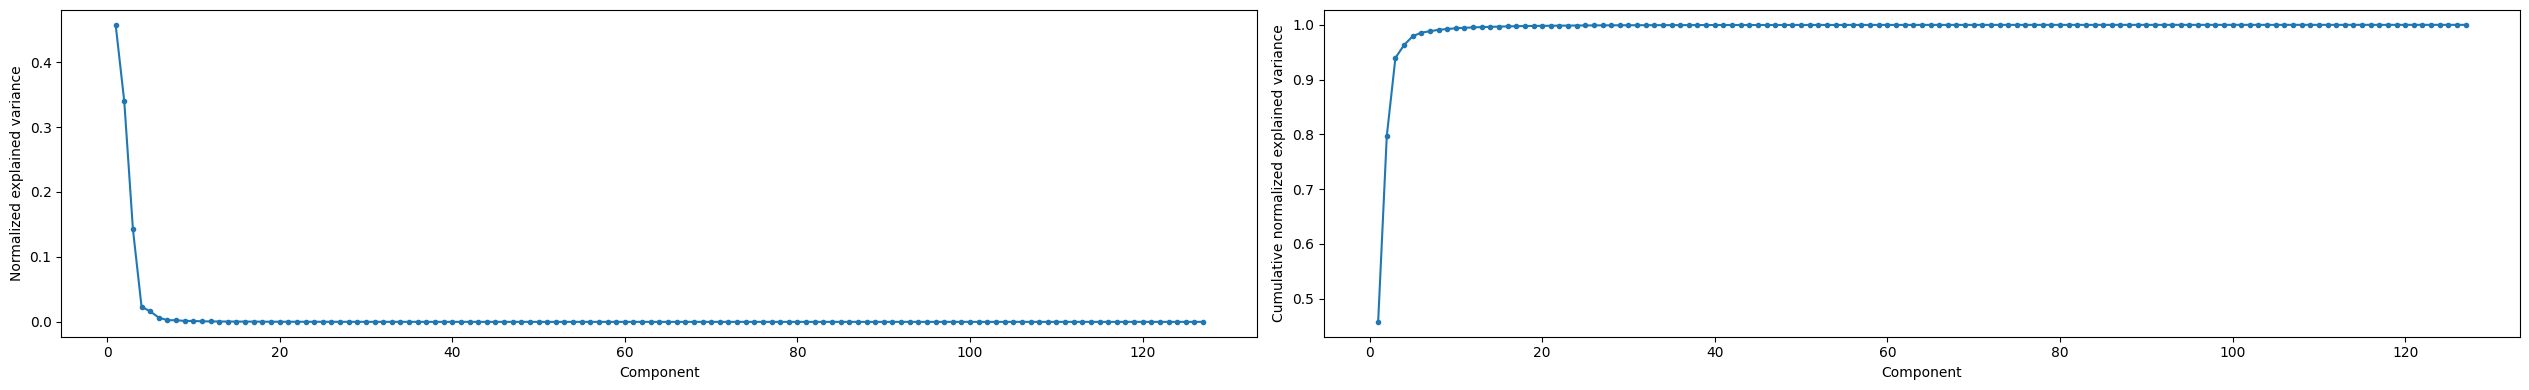

In [22]:
preprocessed = hmp.preprocessing.Standard(epoch_data)

In [23]:
print(preprocessed.data)


<xarray.DataArray (component: 8, all_samples: 21766)> Size: 1MB
array([[ 0.73700213,  0.27166778, -0.23745963, ...,  1.2440114 ,
         1.14741923,  1.15883627],
       [ 1.09578683,  0.43572565, -0.29344112, ...,  0.85816333,
         0.66302279,  0.70156218],
       [-0.14199106, -1.02539651, -1.86392876, ..., -1.27548265,
        -1.29087007, -1.03883414],
       ...,
       [ 1.86984638,  1.20477215,  0.37937619, ...,  0.77814275,
         0.6857213 ,  0.88341174],
       [ 1.21156499,  0.73588136,  0.33323172, ..., -1.17752159,
        -1.37770262, -1.41192572],
       [ 0.2272043 ,  0.30182412,  0.2228837 , ...,  0.92809532,
         0.75935831,  0.64509003]], shape=(8, 21766))
Coordinates: (12/15)
    Sujet                 (all_samples) object 174kB 'S317' 'S317' ... 'S317'
    Ordre                 (all_samples) int64 174kB 1 1 1 1 ... 108 108 108 108
    Cible                 (all_samples) object 174kB 'crabe' 'crabe' ... 'avion'
    FichierSortie         (all_samples) objec

In [24]:
# Defining the expected HMP pattern
event_properties = hmp.patterns.HalfSine.create_expected(sfreq=epoch_data.sfreq)
# Performing the crosscorrelation between the preprocessed data and the expected pattern
trial_data = hmp.trialdata.TrialData.from_preprocessed(preprocessed=preprocessed, pattern=event_properties.template)

In [25]:
model = hmp.models.CumulativeMethod(event_properties)
ll_cumulative, estimates_cumulative = model.fit_transform(trial_data)

  0%|          | 0/286 [00:00<?, ?it/s]

Transition event 1 found around time 562.5
Transition event 2 found around time 687.5
Transition event 3 found around time 1078.125
Transition event 4 found around time 1082.03125

All events found, refitting final combination.
Estimating 4 events model


In [26]:
from mne.io import read_info
info = read_info(path_epochs_unicity, verbose=True)

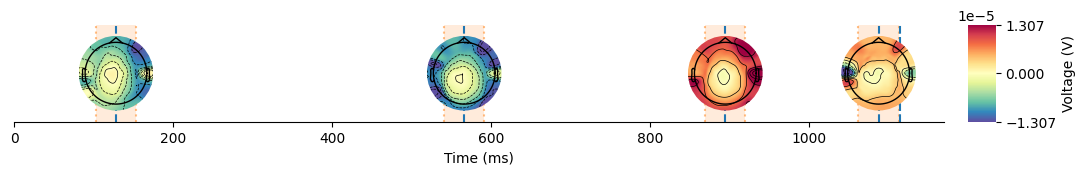

In [27]:
hmp.visu.plot_topo_timecourse(epoch_data, estimates_cumulative, info, as_time=True)

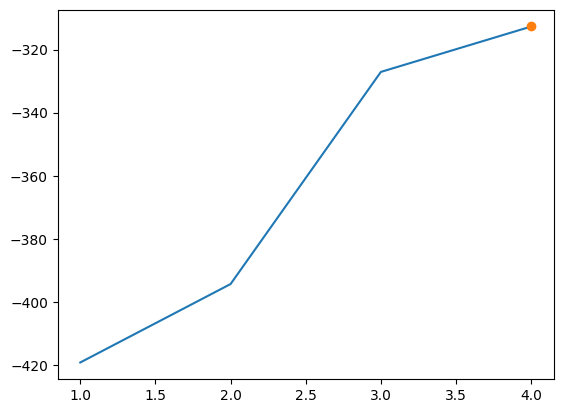

In [28]:
from hmp.visu import plot_topo_timecourse
import numpy as np
import matplotlib.pyplot as plt
model_cumulative = model
cumulative_res = np.array([np.array([model_cumulative.submodels[x].n_events, model_cumulative.submodels[x].lkhs[0]]) for x in model_cumulative.submodels])
plt.plot(cumulative_res[:,0], cumulative_res[:,1])
plt.plot(model_cumulative.final_model.n_events, model_cumulative.final_model.lkhs, 'o', label='Fitted model likelihood')

<Axes: xlabel='Cumulative stage durations from stimulus onset (ms)'>

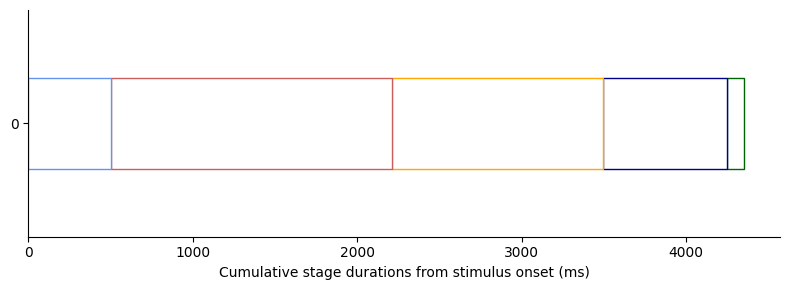

In [31]:
hmp.visu.plot_latencies(estimates_cumulative, epoch_data, as_time=True)

In [16]:
# Compute max likely time for each trial and each event
times =  hmp.utils.event_times(estimates_cumulative, duration=True, add_rt=True, as_time=True)
times

<xarray.DataArray (trial: 76, event: 5)> Size: 3kB
array([[ 140.,  120.,  610.,  180.,   20.],
       [  80.,  550.,  540.,  250.,   10.],
       [ 210., 1020.,  380.,  310.,   10.],
       [  30.,  160.,  370.,  190.,   40.],
       [ 140.,   90.,  400.,  380.,   20.],
       [ 280.,  290.,  310.,   40.,   20.],
       [  50.,  190.,  420.,   10.,   70.],
       [ 120.,  150.,  250.,  350.,   40.],
       [  60.,  750.,  750.,  150.,   20.],
       [  40.,  580.,  110.,  300.,   30.],
       [  80.,  140.,  330.,  280.,   10.],
       [ 120.,  170.,  370.,  540.,   80.],
       [  30.,  680.,  200.,  150.,   50.],
       [  50.,  120.,  390.,   90.,   20.],
       [ 160., 1100.,   80.,  190.,   20.],
       [ 120.,  600.,  470.,   10.,   40.],
       [ 100.,  840.,  130.,  170.,   10.],
       [ 250.,  950.,  490.,  260.,   30.],
       [ 100.,   60.,  450.,   40.,   20.],
       [  90.,  170.,  190.,  390.,   10.],
...
       [ 170.,  470.,  390.,  370.,   20.],
       [ 260.,  380.,  610.,  360.,   20.],
       [ 150.,  240.,   80.,  110.,   10.],
       [ 100.,  910.,  500.,   40.,   20.],
       [  40.,   40.,  270.,  150.,   10.],
       [ 130.,  480.,  210.,  140.,   30.],
       [ 150.,  150.,  590.,  160.,   20.],
       [ 280.,    0.,  280.,  200.,   10.],
       [ 470.,  300.,  120.,  110.,   10.],
       [  70.,  190.,  190.,  210.,   40.],
       [ 210.,   80.,  140.,  400.,   40.],
       [ 120.,  770.,  330.,  230.,   20.],
       [ 180.,  340.,  360.,   90.,   20.],
       [ 170.,  860.,  620.,  230.,   20.],
       [  80.,   90.,  410.,   20.,   50.],
       [  30.,  620.,  720.,  380.,   20.],
       [  90.,  840.,  540.,  120.,   40.],
       [ 180.,  560.,  150.,   40.,   30.],
       [  80.,  290.,  200.,  480.,   20.],
       [  20.,  250.,  210.,   20.,   20.]])
Coordinates:
  * trial        (trial) object 608B MultiIndex
  * participant  (trial) object 608B 'S0' 'S0' 'S0' 'S0' ... 'S0' 'S0' 'S0' 'S0'
  * epoch        (trial) int64 608B 0 2 3 4 5 6 7 ... 97 98 99 101 103 105 107
  * event        (event) int64 40B 0 1 2 3 4
    group        (trial) int8 76B 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

In [17]:
# Turn into dataframe and recover metadata
times = times.unstack().to_dataframe(name='duration')
times = times[~times.duration.isna()]  #Remove rejected trials
times = times.reset_index().set_index(['participant','epoch'])

# Recover metadata and merge with times
times_metadata = epoch_data.sel(sample=0, channel='Cz').to_dataframe().iloc[:,3:]
times_metadata = times_metadata.reset_index().set_index(['participant','epoch'])
times = times.merge(times_metadata, on=['participant','epoch'])

times

KeyError: "not all values found in index 'channel'. Try setting the `method` keyword argument (example: method='nearest')."